<a href="https://colab.research.google.com/github/hlydecker/GANDalf/blob/stable-diffusion/notebooks/GANDalf_basic_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GANDalf: One Shot Face Tolkeinization with Diffusers

## It began, with the forging of the great memes

In the annals of my memory, a whimsical sight befell my gaze, courtesy of the realm known as Reddit. Therein lay an image, resplendent in its mirth, a matrix fashioned by an artistic hand, interweaving the visages and appellations of sundry denizens from the tapestry of Middle-earth.

<img src='https://raw.githubusercontent.com/hlydecker/GANDalf/stable-diffusion/content/Figure1_inspiration.jpg?token=GHSAT0AAAAAAB5IW4IBKEBIF4SEAEQPLKKQZDEKYMQ' width="50%">

In the realm of yore, when first I tread upon this path, I forged a construct upon the framework of NVIDIA's StyleGAN2 and Huggingface's JoJoGAN. This labor yielded commendable fruits in certain instances, yet in the face of more audacious aspirations, it faltered grievously. The task of adding or eradicating facial follicles proved an insurmountable feat for this automaton of neural nets.

Ever undeterred, I charted unexplored terrain in pursuit of novel avenues to generate adaptive hair features, with the hope of rejuvenating my ambitions. Alas, the roads I traversed were fraught with inelegance and inefficiency. It seemed that all was lost, and despair gripped my heart like tendrils of shadow in the forgotten depths.

Until, when chance came, I was ensnared by another model...

## Stable Diffusion: One model to rule them all

In [ ]:
#@title Environment Setup

#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [ ]:
#@markdown Install diffusers and core dependencies.
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.2 MB/s eta 0:00:00


In [ ]:
#@title Diffusion Pipeline Setup

import torch
from diffusers import StableDiffusionPipeline

VRAM = "Standard" #@param ["Standard", "High"]

if VRAM == "Standard":
  pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16) 

if VRAM == "High":
  pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

pipe = pipe.to("cuda")

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

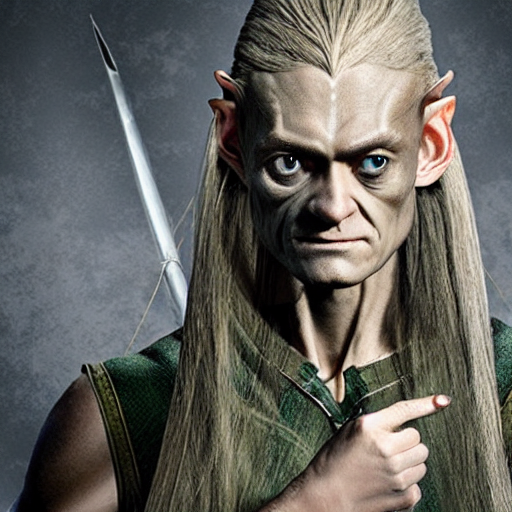

In [ ]:
#@title Fuse one time

first_person = "Gollum" #@param ["Gandalf", "Gimli", "Gollum", "Legolas", "Frodo"] {allow-input: true}

second_person = "Legolas" #@param ["Gandalf", "Gimli", "Gollum", "Legolas", "Frodo"] {allow-input: true}

prompt = f"Cross between {first_person} and {second_person}"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"loltr.png")

# or if you're in a google colab you can directly display it with 
image